### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import warnings 
warnings.filterwarnings("ignore")


### Load and EDA Dataset

In [ ]:
data = pd.read_csv("BBC-text.csv")


In [ ]:
data


In [4]:
data.category


0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, Length: 2225, dtype: object

In [5]:
data.shape


(2225, 2)

In [6]:
data['category'].value_counts()


category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [7]:
data['category'].unique()


array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [ ]:
data.loc[1000]


In [ ]:
data['category'][1000]


In [ ]:
data['text'][1000]


<Axes: xlabel='category'>

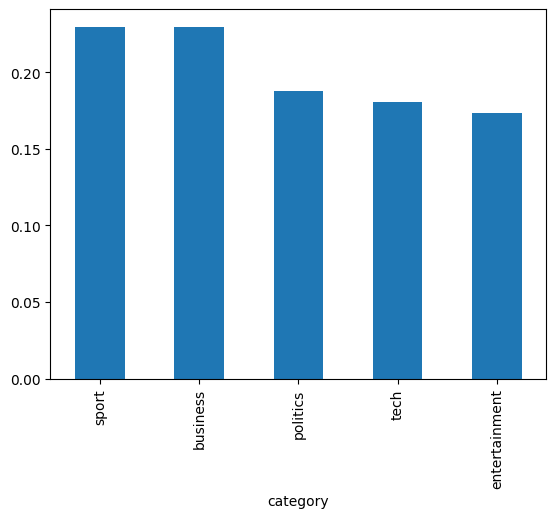

In [9]:
data['category'].value_counts(normalize = True).plot.bar()


### Pre-Process

In [8]:
# clean the text data using regex and data cleaning function
# create a list text
import string

def clean_text(text):
    #r = re.sub('[^a-zA-Z]', ' ', text)
    r= re.sub("'", "",text)
    #r=re.sub("(-\d)+"," ",text)
    r=re.sub("(-\d|\W)+"," ",text)
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [word for word in r if word not in list(string.punctuation)]
    r = [lemmatizer.lemmatize(word) for word in r]
    return ' '.join(r)


In [11]:
clean_text(data['text'][10])
print(data['category'][10])


entertainment


In [12]:
data['clean_text']=data['text'].apply(clean_text )


In [15]:
# Save csv for later
data.to_csv('bbc_news_clean_text.csv')


In [6]:
import pandas as pd
df = pd.read_csv('bbc_news_clean_text.csv')
df.head()


,Unnamed: 0,category,text,clean_text
0,0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [17]:
df.isnull().sum()


Unnamed: 0    0
category      0
text          0
clean_text    0
dtype: int64

In [18]:
df=df.dropna()


In [19]:
# Now encode the data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['label_category'] = label.fit_transform(df['category'])
df.head()


,Unnamed: 0,category,text,clean_text,label_category
0,0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


In [20]:
df['category'].value_counts()


category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

### Feature Extraction

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,  
                        analyzer='word',
                        stop_words= 'english',)
X = cv.fit_transform(df.clean_text).toarray()



In [39]:
import joblib
joblib.dump(cv, 'vectorizer.pkl')   #cv vectorizer


['vectorizer.pkl']

In [40]:
y = df['category']
y


0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, Length: 2225, dtype: object

### Model Selection

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1780, 5000), (445, 5000), (1780,), (445,))

In [42]:
X_train.shape


(1780, 5000)

In [43]:
X_test.shape


(445, 5000)

### training the model

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics


In [45]:
models=[SVC(),
        LinearSVC(),
        KNeighborsClassifier(),
        MultinomialNB(),
        DecisionTreeClassifier(max_depth = 5),
        RandomForestClassifier(n_estimators = 100, random_state = 42 ),
        AdaBoostClassifier(n_estimators = 50, random_state = 42),
        BaggingClassifier(n_estimators = 50, random_state = 42),
        ExtraTreesClassifier(n_estimators = 50, random_state = 42),
        GradientBoostingClassifier(n_estimators = 50, random_state = 42),
        XGBClassifier(n_estimators = 50, random_state = 42),
       ]


In [46]:
#basic
#wrap in function
perform_list = []
for model in models:
    oneVsRest = OneVsRestClassifier(model)
    oneVsRest.fit(X_train, y_train)
    y_pred = oneVsRest.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy,oneVsRest)

    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    # Add performance parameters to list
    # perform_list.append(dict([('Model', model),('Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))
    perform_list.append(dict([('Model', model),('Accuracy', accuracy),('Precision', precision),('Recall', recall),('F1', f1score)]))
    

0.952808988764045 OneVsRestClassifier(estimator=SVC())
0.9483146067415731 OneVsRestClassifier(estimator=LinearSVC())
0.7056179775280899 OneVsRestClassifier(estimator=KNeighborsClassifier())
0.9640449438202248 OneVsRestClassifier(estimator=MultinomialNB())
0.8337078651685393 OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=5))
0.9573033707865168 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))
0.9325842696629213 OneVsRestClassifier(estimator=AdaBoostClassifier(random_state=42))
0.9483146067415731 OneVsRestClassifier(estimator=BaggingClassifier(n_estimators=50,
                                                random_state=42))
0.9595505617977528 OneVsRestClassifier(estimator=ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))
0.946067415730337 OneVsRestClassifier(estimator=GradientBoostingClassifier(n_estimators=50,
                                                         random_state=42))
0.9483146

In [ ]:
0.952808988764045 OneVsRestClassifier(estimator=SVC())
0.9483146067415731 OneVsRestClassifier(estimator=LinearSVC())
0.7056179775280899 OneVsRestClassifier(estimator=KNeighborsClassifier())
0.9640449438202248 OneVsRestClassifier(estimator=MultinomialNB())
0.8337078651685393 OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=5))
0.9573033707865168 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))
0.9325842696629213 OneVsRestClassifier(estimator=AdaBoostClassifier(random_state=42))
0.9483146067415731 OneVsRestClassifier(estimator=BaggingClassifier(n_estimators=50,
                                                random_state=42))
0.9595505617977528 OneVsRestClassifier(estimator=ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))
0.946067415730337 OneVsRestClassifier(estimator=GradientBoostingClassifier(n_estimators=50,
                                                         random_state=42))
0.9483146067415731 OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))


In [47]:
newlist=pd.DataFrame(perform_list)
newlist


,Model,Accuracy,Precision,Recall,F1
0,SVC(),0.952809,0.952809,0.952809,0.952809
1,LinearSVC(),0.948315,0.948315,0.948315,0.948315
2,KNeighborsClassifier(),0.705618,0.705618,0.705618,0.705618
3,MultinomialNB(),0.964045,0.964045,0.964045,0.964045
4,DecisionTreeClassifier(max_depth=5),0.833708,0.833708,0.833708,0.833708
5,RandomForestClassifier(random_state=42),0.957303,0.957303,0.957303,0.957303
6,AdaBoostClassifier(random_state=42),0.932584,0.932584,0.932584,0.932584
7,"BaggingClassifier(n_estimators=50, random_stat...",0.948315,0.948315,0.948315,0.948315
8,"ExtraTreesClassifier(n_estimators=50, random_s...",0.959551,0.959551,0.959551,0.959551
9,"GradientBoostingClassifier(n_estimators=50, ra...",0.946067,0.946067,0.946067,0.946067


In [51]:
svc1 =  SVC(kernel = "linear")#,gamma='auto')
svc1.fit(X_train,y_train)
ypredlinear = svc1.predict(X_test)
accuracy_score(ypredlinear,y_test)


0.950561797752809

In [52]:
svc2 =  SVC(kernel = "rbf")
svc2.fit(X_train,y_train)
ypredrbf = svc2.predict(X_test)
accuracy_score(ypredrbf,y_test)


0.9438202247191011

In [53]:
svc3 =  SVC(kernel = "poly")
svc3.fit(X_train,y_train)
ypredpoly = svc3.predict(X_test)
accuracy_score(ypredpoly,y_test)


0.5213483146067416

In [54]:
svc4 =  SVC(kernel = "sigmoid")
svc4.fit(X_train,y_train)
ypredsig = svc4.predict(X_test)
accuracy_score(ypredsig,y_test)


0.9550561797752809

In [57]:
mnb=MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True)
mnb.fit(X_train,y_train)
mnbypred = mnb.predict(X_test)
accuracy_score(mnbypred,y_test)


0.9685393258426966

In [58]:
mnbg=MultinomialNB()
mnbg.fit(X_train,y_train)
mnbgypred = mnbg.predict(X_test)
accuracy_score(mnbgypred,y_test)


0.9685393258426966

### best model

In [59]:
model=MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True)
model.fit(X_train,y_train)
mnby = model.predict(X_test)
accuracy_score(mnby,y_test)


0.9685393258426966

In [60]:
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, mnby, 
                                    target_names= df['category'].unique()))


CLASSIFICATIION METRICS
               precision    recall  f1-score   support

         tech       0.98      0.93      0.95       101
     business       1.00      0.94      0.97        81
        sport       0.92      0.99      0.95        83
entertainment       0.99      1.00      0.99        98
     politics       0.95      0.99      0.97        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(mnby,y_test)
cm


array([[94,  1,  1,  0,  0],
       [ 0, 76,  0,  0,  0],
       [ 6,  1, 82,  0,  0],
       [ 0,  0,  0, 98,  1],
       [ 1,  3,  0,  0, 81]], dtype=int64)

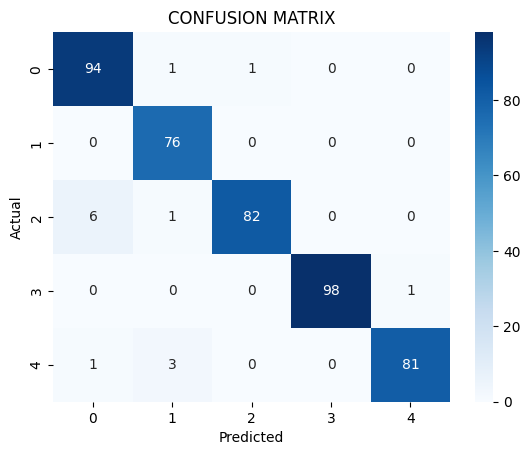

In [89]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX")
plt.show()


In [61]:
# model save
joblib.dump(model, 'news_classifier_mnb.pkl') #classifier


['news_classifier_mnb.pkl']

### Text Classification

In [4]:
import joblib
cv=joblib.load('vectorizer.pkl')
classi=joblib.load('news_classifier_mnb.pkl')


In [7]:
info=df['clean_text'][5]
print(info)
print(df['category'][5])


howard hit back mongrel jibe michael howard said claim peter hain tory leader acting like attack mongrel show labour rattled opposition upbeat speech party spring conference brighton said labour campaigning tactic proved tory hitting home mr hain made claim tory tactic anti terror bill debate something tell someone somewhere little bit rattled mr howard said mr hain leader common told bbc radio four today programme mr howard stance government anti terrorism legislation putting country risk accused tory leader behaving like attack mongrel playing opposition opposition sake mr howard told party labour would anything say anything claim anything cling office cost far year compared fagin shylock flying pig morning peter hain even called mongrel know something tell someone somewhere little bit rattled environment secretary margaret beckett rejected mr howard comment telling radio 4 pm programme labour rattled real duty try get people focus michael howard record proposal trying put forward co

In [9]:
headlines=[clean_text(info)]
headlines


['howard hit back mongrel jibe michael howard said claim peter hain tory leader acting like attack mongrel show labour rattled opposition upbeat speech party spring conference brighton said labour campaigning tactic proved tory hitting home mr hain made claim tory tactic anti terror bill debate something tell someone somewhere little bit rattled mr howard said mr hain leader common told bbc radio four today programme mr howard stance government anti terrorism legislation putting country risk accused tory leader behaving like attack mongrel playing opposition opposition sake mr howard told party labour would anything say anything claim anything cling office cost far year compared fagin shylock flying pig morning peter hain even called mongrel know something tell someone somewhere little bit rattled environment secretary margaret beckett rejected mr howard comment telling radio 4 pm programme labour rattled real duty try get people focus michael howard record proposal trying put forward 

In [10]:

y_pred1 = cv.transform(headlines)
y_pred1


<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 170 stored elements in Compressed Sparse Row format>

In [11]:
prediction=y_pred1.toarray()


In [12]:
classi.predict(prediction)[0]


'politics'

In [13]:
#test 2
info2=df['clean_text'][4]
print(info2)
print(df['category'][4])


ocean twelve raid box office ocean twelve crime caper sequel starring george clooney brad pitt julia robert gone straight number one u box office chart took 40 8m 21m weekend ticket sale according studio estimate sequel follows master criminal try pull three major heist across europe knocked last week number one national treasure third place wesley snipe blade trinity second taking 16 1m 8 4m rounding top five animated fable polar express starring tom hank festive comedy christmas kranks ocean twelve box office triumph mark fourth biggest opening december release u three film lord ring trilogy sequel narrowly beat 2001 predecessor ocean eleven took 38 1m 19 8m opening weekend 184m 95 8m total remake 1960s film starring frank sinatra rat pack ocean eleven directed oscar winning director steven soderbergh soderbergh return direct hit sequel reunites clooney pitt robert matt damon andy garcia elliott gould catherine zeta jones join star cast fun good holiday movie said dan fellman preside

In [16]:
test2=[clean_text(info2)]
print(test2)
ypred2 = (cv.transform(test2)).toarray()
print(ypred2)
classi.predict(ypred2)
# prediction=ypred.toarray()
# print(prediction)
# classi.predict(prediction)[0]
# y_pred2 = (tf.transform(test2)).toarray()
# classi.predict(y_pred2)[0]
#model_prediction=y_pred2.toarray()
#classi.predict(model_prediction)[0]


['ocean twelve raid box office ocean twelve crime caper sequel starring george clooney brad pitt julia robert gone straight number one u box office chart took 40 8m 21m weekend ticket sale according studio estimate sequel follows master criminal try pull three major heist across europe knocked last week number one national treasure third place wesley snipe blade trinity second taking 16 1m 8 4m rounding top five animated fable polar express starring tom hank festive comedy christmas kranks ocean twelve box office triumph mark fourth biggest opening december release u three film lord ring trilogy sequel narrowly beat 2001 predecessor ocean eleven took 38 1m 19 8m opening weekend 184m 95 8m total remake 1960s film starring frank sinatra rat pack ocean eleven directed oscar winning director steven soderbergh soderbergh return direct hit sequel reunites clooney pitt robert matt damon andy garcia elliott gould catherine zeta jones join star cast fun good holiday movie said dan fellman presi

array(['entertainment'], dtype='<U13')

In [3]:
models=[
        SVC(kernel='linear'),
        LinearSVC(),
        KNeighborsClassifier(),
        MultinomialNB(),

        ]
            

In [12]:
perform_list = []
for i in models:
    print(i)
    # model=



SVC(kernel='linear')


TypeError: list indices must be integers or slices, not SVC